# Introductory Analysis

In [1]:
from pathlib import *
import sqlalchemy as sa
import numpy as np
import pandas as pd
import axelrod as axl
import nashpy as nash
import matplotlib.pyplot as plt
import axelrod as axl
from datetime import date
from pandas.plotting import table
%matplotlib inline

Size of Database as of writing: 

In [2]:
today_date = date.today().strftime("%d_%m_%Y")
database_management_sys = sa.create_engine("sqlite:///../database-code/data/se/main.db")
connect_dbms_to_db = database_management_sys.connect()
se_folk_thm_data = pd.read_sql("folk_theorem_experiment", connect_dbms_to_db)

database_size_path = Path("../database-code/data/se/" + today_date + "/")
database_size_path.mkdir(parents=True, exist_ok=True)
p = database_size_path / "entries-in-database.txt"
q = database_size_path / "number-of-tournaments.txt"
with open(str(p), "w") as num_of_entries_file:
    num_of_entries_file.write(str(len(se_folk_thm_data)))
with open(str(q), "w") as num_of_tournaments_file:
    num_of_tournaments_file.write(str(max(se_folk_thm_data["tournament_player_set"])))
len(se_folk_thm_data), max(se_folk_thm_data["tournament_player_set"])

(825700, 159)

In [3]:
se_folk_thm_data.head()

,experiment_number,number_of_players,tournament_player_set,player_strategy_name,is_long_run_time,is_stochastic,memory_depth_of_strategy,prob_of_game_ending,payoff_matrix,num_of_repetitions,num_of_equilibria,nash_equilibria,least_prob_of_defection,greatest_prob_of_defection,noise,warning_message
0,0,2,0,Inverse,False,True,Inf,0.001000,3. 0.99159429 1.03362284 1.,500,3.0,1. 0. 1. 0. ...,0.0,1.0,0.0,None
1,0,2,0,Defector,False,False,0,0.001000,3. 0.99159429 1.03362284 1.,500,3.0,1. 0. 1. 0. ...,0.0,1.0,0.0,None
2,1,2,0,Inverse,False,True,Inf,0.011081,3. 0.95530245 1.1787902 1.,500,3.0,1. 0. 1. 0. ...,0.0,1.0,0.0,None
3,1,2,0,Defector,False,False,0,0.011081,3. 0.95530245 1.1787902 1.,500,3.0,1. 0. 1. 0. ...,0.0,1.0,0.0,None
4,2,2,0,Inverse,False,True,Inf,0.021162,3. 0.9212484 1.31500641 1.,500,3.0,1. 0. 1. 0. ...,0.0,1.0,0.0,None


### Summary Statistics

In [4]:
summary_stats_path = Path("../../images/folk_thm/initial_analysis/")
summary_stats_path.mkdir(parents=True, exist_ok=True)
summary_stats = se_folk_thm_data.describe()
p = summary_stats_path / "summary_stats.html"
table_html = summary_stats.to_html(str(p))

The average number of players per tournament in the experiment is 5 players.

The probabilities of the game ending is centred around p = 0.5.

The average number of Nash equilibria calculated from the payoff matrices is 2, with the majority of games having 1 - 3 equilibria. However, what is interesting here is that at least one game obtained 39 equilibria (as can be seen from the table above). A further search regarding this will be executed later.

The mean for the least probability of defection in any one game is 0.342275 and for the greatest probability of defection it is 0.459722. However, both probabilities have yielded a value of 0 and 1 over the experiment. 

### Strategy Statistics

In [5]:
strategy_data = se_folk_thm_data[["tournament_player_set", "player_strategy_name", "is_stochastic", "is_long_run_time", "memory_depth_of_strategy"]].drop_duplicates()
strategy_data.head()

,tournament_player_set,player_strategy_name,is_stochastic,is_long_run_time,memory_depth_of_strategy
0,0,Inverse,True,False,Inf
1,0,Defector,False,False,0
2200,1,ALLCorALLD,True,False,1
2201,1,Defector,False,False,0
4400,2,Handshake,False,False,Inf


In [6]:
strategy_counts = strategy_data["player_strategy_name"].value_counts()
strategy_counts.head(), strategy_counts.tail()

(Defector                   160
 ZD-GEN-2: 0.125, 0.5, 3      9
 Tideman and Chieruzzi        8
 Cycler DC                    7
 ZD-GTFT-2: 0.25, 0.5         7
 Name: player_strategy_name, dtype: int64, Rowsam                    1
 Soft Go By Majority: 5    1
 Spiteful Tit For Tat      1
 Suspicious Tit For Tat    1
 Anti Tit For Tat          1
 Name: player_strategy_name, dtype: int64)

In [7]:
len(strategy_counts[strategy_counts == 1]), len(strategy_data["player_strategy_name"].drop_duplicates())

(38, 200)

Excluding the defector, the strategy which appeared the most (9 times) is ZD-GEN-2: 0.125, 0.5, 3; followed closely by Tideman and Chieruzzi with 7 times. On the other hand 38 out of the 200 strategies executed in this experiment appeared only once. Next, these counts will be plotted with regards to the players characteristics to see if there is any overarching bias that needs to be taken into account.

In [8]:
strategy_data["is_stochastic"].value_counts()

False    551
True     204
Name: is_stochastic, dtype: int64

In [9]:
strategy_data["is_long_run_time"].value_counts()

False    755
Name: is_long_run_time, dtype: int64

In [10]:
strategy_data["memory_depth_of_strategy"].value_counts()

Inf    366
0      166
1      104
2       35
5       26
3       22
10      11
200      6
11       4
6        4
20       3
40       3
4        2
12       2
8        1
Name: memory_depth_of_strategy, dtype: int64

The majority of strategies participating in this experiment had either an infinite, one or no memory depth.

In [11]:
strategy_counts_no_defect = strategy_counts.drop("Defector")
strategy_counts_no_defect.head(), len(strategy_counts_no_defect)

(ZD-GEN-2: 0.125, 0.5, 3              9
 Tideman and Chieruzzi                8
 Cycler DC                            7
 ZD-GTFT-2: 0.25, 0.5                 7
 General Soft Grudger: n=1,d=4,c=2    7
 Name: player_strategy_name, dtype: int64, 199)

In [12]:
labels = []
for player in strategy_counts_no_defect.index:
    stochastic_player = pd.Series(strategy_data[strategy_data["player_strategy_name"] == player]["is_stochastic"])
    stochastic_player.index = range(len(stochastic_player))
    stochastic_player = stochastic_player[0]
    labels.append(stochastic_player)

In [13]:
len(labels)

199

In [14]:
player_stochastic_dict = {"player_strategy_name" : strategy_counts_no_defect.index,
                            "strategy_counts" : strategy_counts_no_defect.values,
                            "is_stochastic" : labels}

player_stochastic_data = pd.DataFrame(player_stochastic_dict)

In [15]:
player_stochastic_data.head()

,player_strategy_name,strategy_counts,is_stochastic
0,"ZD-GEN-2: 0.125, 0.5, 3",9,True
1,Tideman and Chieruzzi,8,False
2,Cycler DC,7,False
3,"ZD-GTFT-2: 0.25, 0.5",7,True
4,"General Soft Grudger: n=1,d=4,c=2",7,False


In [16]:
stochastic_player_data = player_stochastic_data[player_stochastic_data["is_stochastic"] == True]
deterministic_player_data = player_stochastic_data[player_stochastic_data["is_stochastic"] == False]
stochastic_player_data.head(), deterministic_player_data.head()

(                  player_strategy_name  strategy_counts  is_stochastic
 0              ZD-GEN-2: 0.125, 0.5, 3                9           True
 3                 ZD-GTFT-2: 0.25, 0.5                7           True
 5   Meta Winner Memory One: 34 players                6           True
 7                           GTFT: 0.33                6           True
 10                           Joss: 0.9                6           True,
                 player_strategy_name  strategy_counts  is_stochastic
 1              Tideman and Chieruzzi                8          False
 2                          Cycler DC                7          False
 4  General Soft Grudger: n=1,d=4,c=2                7          False
 6                      Cycler CCCDCD                6          False
 8                          Fortress3                6          False)

In [17]:
len(stochastic_player_data[stochastic_player_data["strategy_counts"] == 2])

22

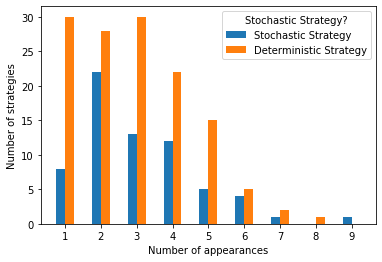

In [18]:
plot_path = summary_stats_path / "strategy_appearances.pdf"

stochastic_counts = stochastic_player_data["strategy_counts"].value_counts()
deterministic_counts = deterministic_player_data["strategy_counts"].value_counts()
for index in range(1, 10):
    if index not in stochastic_counts.index:
        stochastic_counts[index] = 0
    else:
        continue
stochastic_counts = stochastic_counts.sort_index()
for index in range(1, 10):
    if index not in deterministic_counts.index:
        deterministic_counts[index] = 0
    else:
        continue
deterministic_counts = deterministic_counts.sort_index()

width_of_bars = 0.25
xaxis_labels = list(range(1, 10))
xaxis = np.arange(len(xaxis_labels))

graph = plt.figure()
axes = graph.add_subplot(1, 1, 1)
axes.set_xlabel("Number of appearances")
axes.set_ylabel("Number of strategies")
axes.set_xticks(xaxis)
axes.set_xticklabels(xaxis_labels)
axes.bar(xaxis - width_of_bars/2, list(stochastic_counts.values), width_of_bars, label="Stochastic Strategy")
axes.bar(xaxis + width_of_bars/2, list(deterministic_counts.values), width_of_bars, label="Deterministic Strategy")
axes.legend(title="Stochastic Strategy?")
graph.savefig(str(plot_path))

In [19]:
len(axl.filtered_strategies(filterset={"stochastic": True})), len(axl.filtered_strategies(filterset={"stochastic": False}))

(86, 156)

### Number of Nash Equilibria

In [154]:
nash_equilibria_data = se_folk_thm_data[["experiment_number", "number_of_players", "prob_of_game_ending", "num_of_equilibria", "nash_equilibria"]].drop_duplicates()

In [155]:
nash_equilibria_data["num_of_equilibria"].value_counts()

1.0     131773
3.0      28793
5.0       4761
4.0       3333
7.0       2215
9.0       1123
2.0        923
6.0        643
11.0       439
8.0        190
10.0       166
13.0       163
15.0        99
17.0        87
16.0        80
18.0        70
12.0        58
14.0        51
25.0        45
19.0        30
21.0        16
23.0        10
27.0         9
20.0         7
37.0         5
38.0         5
26.0         3
31.0         3
35.0         2
22.0         2
29.0         2
39.0         1
Name: num_of_equilibria, dtype: int64

In [151]:
separated_player_dict = {}
for player_number in nash_equilibria_data["number_of_players"].drop_duplicates():
    separated_player_dict[str(player_number)] = nash_equilibria_data[nash_equilibria_data["number_of_players"] == player_number]
separated_player_dict.keys()   

dict_keys(['2', '3', '4', '5', '6', '7', '8'])

In [152]:
player_num_of_equilibria_data = [separated_player_dict[str(player_number)]["num_of_equilibria"] for player_number in range(2, 9)]
for element in range(7):
    player_num_of_equilibria_data[element].index = range(len(player_num_of_equilibria_data[element]))

C:\Users\sophi\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:2093: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
C:\Users\sophi\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


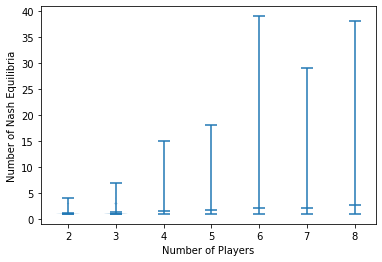

In [153]:
player_num_of_equilibria_violin_path = summary_stats_path / "player_num_of_equilibria_violinplot.pdf"
player_num_of_equilibria_violinplot = plt.figure()
axes = player_num_of_equilibria_violinplot.add_subplot(1, 1, 1)
axes.set_xlabel("Number of Players")
axes.set_xticks(np.arange(1, len(range(7))+1))
axes.set_xticklabels(list(range(2, 9)))
axes.set_ylabel("Number of Nash Equilibria")
axes.violinplot(player_num_of_equilibria_data, showmeans=True, showmedians=True)
player_num_of_equilibria_violinplot.savefig(str(player_num_of_equilibria_violin_path))